In [2]:
import os
import pandas as pd
from blockbaxAnalyser import blockbaxAnalyser
import numpy as np
import matplotlib.pyplot as plt

# --------------- SETTINGS -----------------------------------------
verbose = True # Set to True to get intermediate prints of results
plots = False
sb_numbers = [148098, 148097, 148091, 148088, 148076, 148096]
temp_steps = [-20, -10, 0, 10, 20, 30, 40, 50]
temp_steps_short = [-10, 0, 10, 20]
y_steps = [-10, -5, -2, 0, 2, 5, 10]
bins_y = [-11, -7, -3.5, -1, 1, 3.5, 7, 10]
bins_temp = [-25, -15, -5, 5, 15, 25, 35, 45, 55]
tl_min = -2 # min x value of trendline
tl_max = 2 # max x value of trendline

plot_from_date = "2022-04-28 18:30:00"
plot_till_date = "2022-05-05 01:00:00"

In [3]:
# --------------- INITIALISATION --------------------------------------
analyser = blockbaxAnalyser(sb_numbers = sb_numbers, 
plot_from_date=plot_from_date, 
plot_till_date=plot_till_date)

analyser.bins_y = bins_y
analyser.bins_temp = bins_temp
analyser.y_steps = y_steps
analyser.temp_steps = temp_steps

analyser.dataPrep(ref_filename=os.path.join(os.path.abspath('').removesuffix('blockbaxAnalyser.py'),"Ref","jewell_ref_april.txt"), 
offset_date_start="2022-05-02 03:40:00",
offset_date_end="2022-05-02 05:35:00")

if verbose:
    i=0
    print(analyser.dfs[i].to_string())

                               Datetime  Temperature    Y value  Reference Y setting Temp setting     Y mean     Y std   Ref mean   Ref std  Temp mean  Temp std   Y stdtf  Yref stdtf  Temp stdtf
Datetime                                                                                                                                                                                          
2022-04-28 18:31:00 2022-04-28 18:31:00   -16.799999   9.713613   9.380461        10          -20   9.190120  0.203704   9.163332  0.058500 -18.976191  0.379051  2.569866    3.711615    5.741152
2022-04-28 18:36:01 2022-04-28 18:36:01   -17.400000   9.731923   9.387061        10          -20   9.190120  0.203704   9.163332  0.058500 -18.976191  0.379051  2.659754    3.824436    4.158252
2022-04-28 18:41:00 2022-04-28 18:41:00   -17.799999   9.719716   9.370361        10          -20   9.190120  0.203704   9.163332  0.058500 -18.976191  0.379051  2.599829    3.538965    3.102987
2022-04-28 18:46:02 2022-

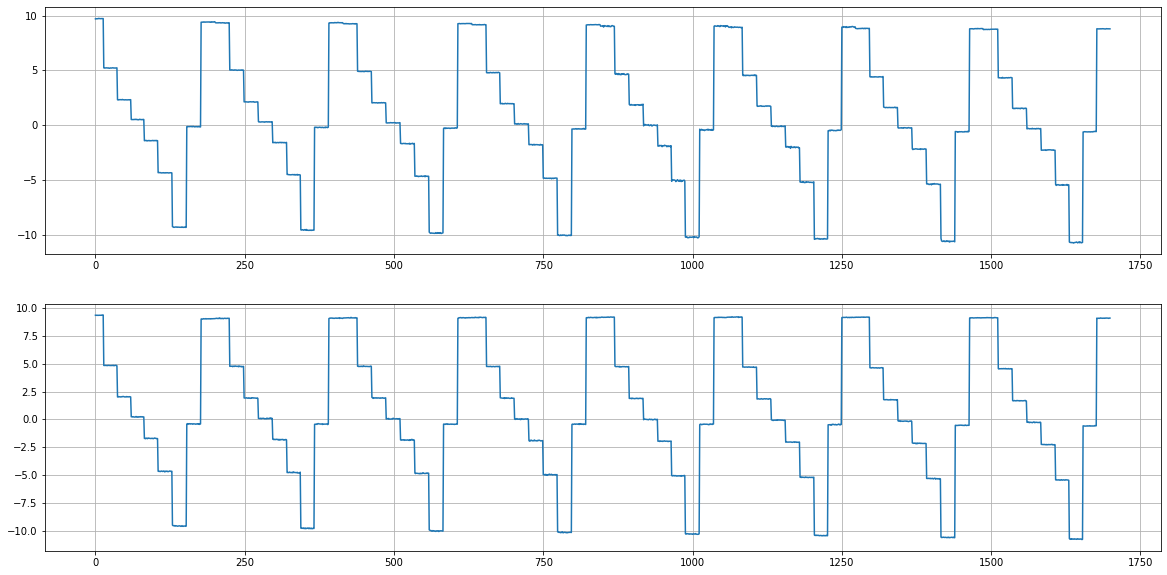

In [4]:
# --- PLOT REF DATA
i = 0
xmax = len(analyser.dfs[i]["Reference"])
x = np.arange(0,xmax)

fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(x, analyser.dfs[i]["Y value"])
ax2.plot(x, analyser.dfs[i]["Reference"])
ax1.grid()
ax2.grid()
plt.show()

In [5]:

# Drop unnecessary columns
for i in range(len(analyser.dfs)):
    analyser.dfs[i] = analyser.dfs[i].drop(["Datetime", "Y mean", "Y std", "Ref mean", "Ref std", "Temp mean", "Temp std", "Y stdtf", "Yref stdtf", "Temp stdtf"], axis =1)

# --- CALCULATING KT0 ---
n0_list = []
t0_list = []

for i in range(len(analyser.dfs)):
    # Determine output at 0 deg inclination and 20 C
    subset = analyser.dfs[i].groupby("Y setting").get_group(0)
    subsubset = subset.groupby("Temp setting").get_group(20)
    n0_list.append(subsubset["Y value"].mean()) # Get average sensor output at 0 degrees set angle and 20 degrees set temperature per smartbrick
    t0_list.append(subsubset["Temperature"].mean()) # Get average temperature from same part of dataset per smartbrick

    analyser.dfs[i]["KT0"] = (n0_list[i]-analyser.dfs[i]["Y value"])/(t0_list[i]-analyser.dfs[i]["Temperature"])

print(analyser.dfs[0].to_string())

                     Temperature    Y value  Reference Y setting Temp setting         KT0
Datetime                                                                                 
2022-04-28 18:31:00   -16.799999   9.713613   9.380461        10          -20   -0.256276
2022-04-28 18:36:01   -17.400000   9.731923   9.387061        10          -20   -0.252833
2022-04-28 18:41:00   -17.799999   9.719716   9.370361        10          -20   -0.249980
2022-04-28 18:46:02   -18.200001   9.731923   9.382961        10          -20   -0.247793
2022-04-28 18:51:00   -18.500000   9.725820   9.368061        10          -20   -0.245804
2022-04-28 18:56:00   -18.700001   9.756337   9.377661        10          -20   -0.245345
2022-04-28 19:01:00   -18.900000   9.750234   9.378561        10          -20   -0.243994
2022-04-28 19:06:00   -19.000000   9.744130   9.379661        10          -20   -0.243249
2022-04-28 19:11:00   -19.100000   9.744130   9.379461        10          -20   -0.242656
2022-04-28

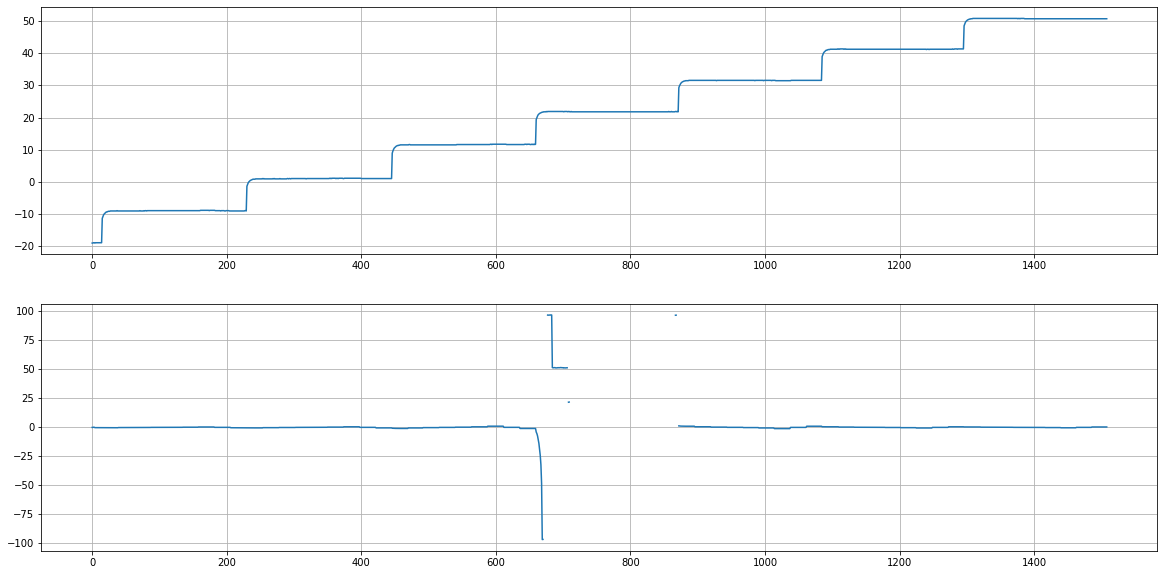

In [6]:
# --- Plot each column ---
xmax = len(analyser.dfs[i]["Reference"])
x = np.arange(0,xmax)

fig = plt.figure()
fig.set_size_inches(20,10)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(x, analyser.dfs[i]["Temperature"])
ax2.plot(x, analyser.dfs[i]["KT0"])
ax1.grid()
ax2.grid()
plt.show()